In [1]:
import numpy as np         
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from mpl_toolkits.axes_grid1 import *
import h5py
from matplotlib import rcParams
import pandas as pd
import matplotlib.mlab as mlab
import corner

%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 25,
         'axes.titlesize': 25,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
mpl.rcParams.update(params)
plt.jet()

<Figure size 1080x360 with 0 Axes>

In [2]:
path="./data/"

In [3]:
filename = path+'example_features.hdf5'
f = h5py.File(filename, 'r')
print(f.keys())
ID = f['ID'][...]
coor = f['coor'][...]
con = f['con'][...]
nc = f['nc'][...]
ad = f['ad'][...]
den = f['den'][...]
ra = f['mr'][...]
Dnc = f['Dnc'][...]
Dad = f['Dad'][...]
Dden = f['Dden'][...]
Dra = f['Dmr'][...]
f.close()

# To arrays
ID=np.array(ID).astype(int)
x = np.array(coor[0])
y = np.array(coor[1])
z = np.array(coor[2])
nc=np.array(nc)
ad=np.array(ad)
den=np.array(den)
ra=np.array(ra)
Dnc=np.array(Dnc)
Dad=np.array(Dad)
Dden=np.array(Dden)
Dra=np.array(Dra)


#Removing the borders of the simulation
border = (x>5) & (x<295) & (y>5) & (y<295) & (z>5) & (z<295)

nc = nc[border]
ad = ad[border]
den = den[border]
ra = ra[border]
Dnc = Dnc[border]
Dad = Dad[border]
Dden = Dden[border]
Dra = Dra[border]

columns = ['nc','ad','den','mr','Dnc','Dad','Dden','Dmr']
df = pd.DataFrame(np.array([nc,ad,den,ra,Dnc,Dad,Dden,Dra]).T,columns=columns)

<KeysViewHDF5 ['Dabc', 'Dad', 'Dden', 'Dmr', 'Dnc', 'ID', 'abc', 'ad', 'con', 'coor', 'den', 'mr', 'nc', 'vol']>


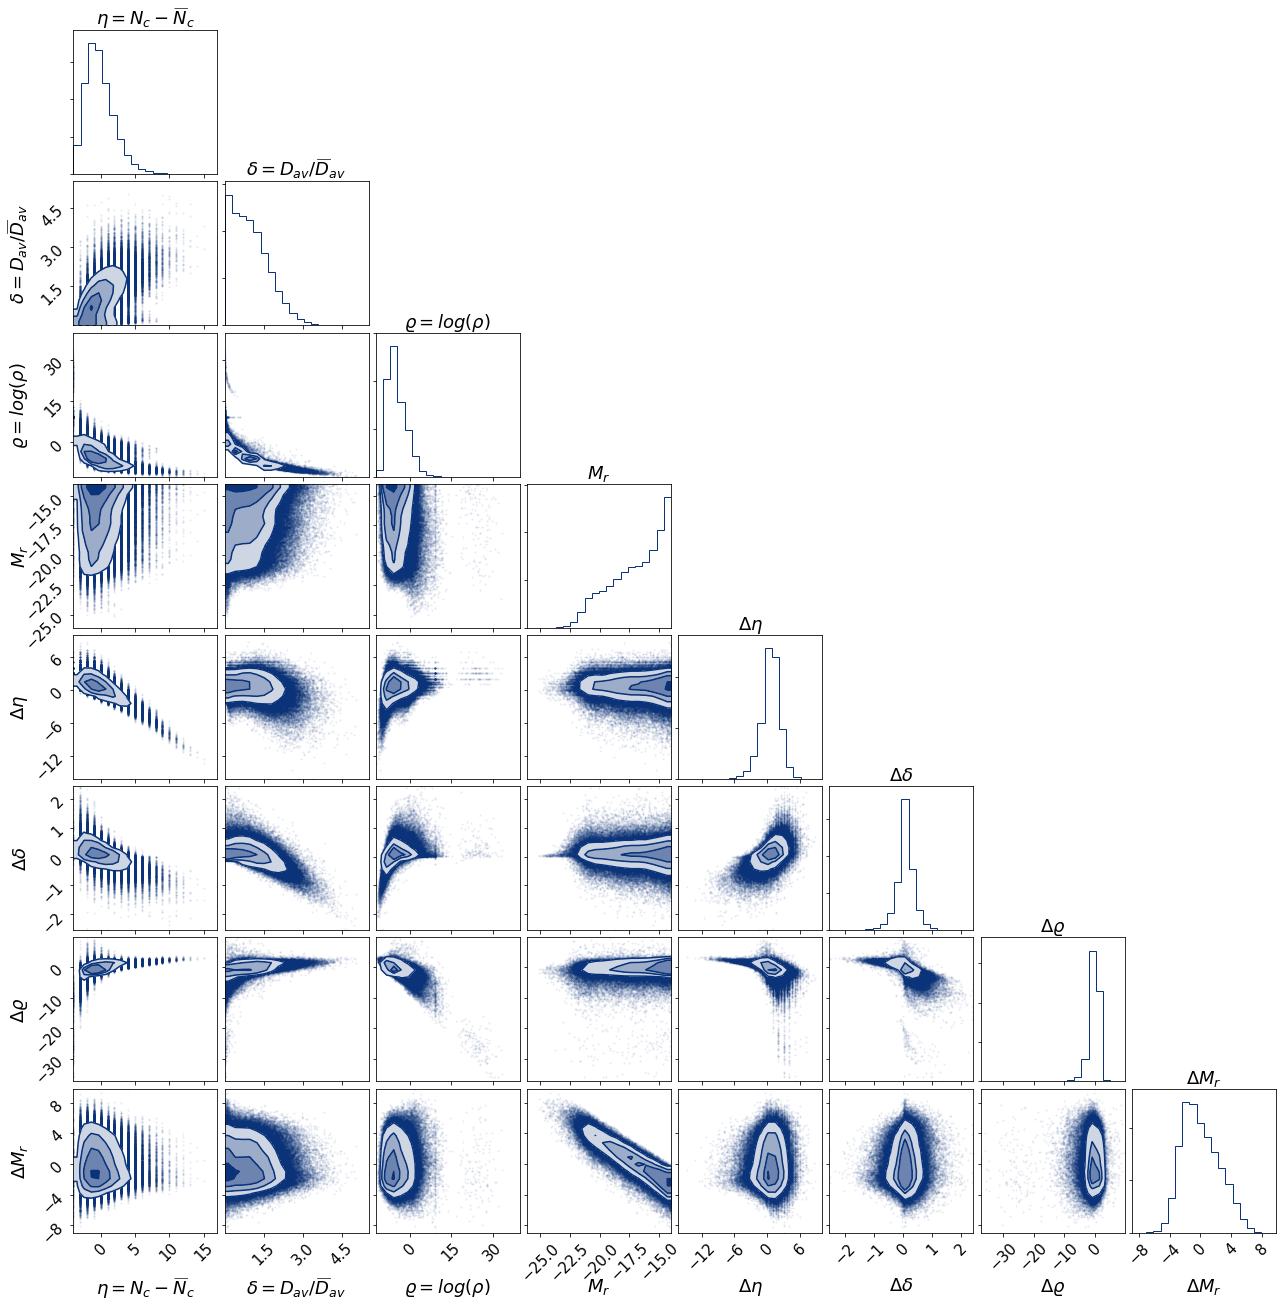

In [4]:
texlabels=[r'$\eta = N_c - \widebar{N}_c$',r'$\delta = D_{av}/\widebar{D}_{av}$',r'$\varrho = log(\rho)$',r'$M_r$',
          r'$\Delta \eta$',r'$\Delta \delta$',r'$\Delta \varrho$',r'$\Delta M_r$']
fig = corner.corner(df, bins = 20, color="#0a337a", labels=texlabels, show_titles = True, title_fmt = None, fill_contours=True, label_kwargs = dict(fontsize=18), title_kwargs = {"fontsize": 18})
for ax in fig.get_axes():
      ax.tick_params(axis = 'both', labelsize = 15)
plt.savefig('./figures/feature_correlations.png', bbox_inches='tight', resterized=True, transparent=True)